<h1 align=center><font size = 5>Tokyo 2020 Olympics Medals Prediction</font></h1>

_Importing necessary libraris_

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from sci_analysis import analyze

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler #Scaling of data

from sklearn.model_selection import train_test_split

# Linear regression Model using Sklearn 
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

### Medals won and Contingent size by country in last 4 Olympics

source<br>
Rio 2016: https://en.wikipedia.org/wiki/2016_Summer_Olympics_medal_table#Medal_table

London 2012: https://en.wikipedia.org/wiki/2012_Summer_Olympics_medal_table

Beijing 2008: https://en.wikipedia.org/wiki/2008_Summer_Olympics_medal_table

Athens 2004: https://en.wikipedia.org/wiki/2004_Summer_Olympics_medal_table

### Rio 2016 Olympics

In [2]:
url = 'https://en.wikipedia.org/wiki/2016_Summer_Olympics_medal_table#Medal_table'

In [3]:
dataframe_list = pd.read_html(url,flavor='bs4')

In [4]:
len(dataframe_list)

6

In [5]:
Rio = dataframe_list[1]
Rio.rename({'NOC':"Country Name",'Total':'Rio 2016 (G+S+B)'},axis=1,inplace=True)
Rio.drop(['Rank','Gold','Silver','Bronze'],inplace=True,axis=1)
Rio.head()

,Country Name,Rio 2016 (G+S+B)
0,United States (USA),121
1,Great Britain (GBR),67
2,China (CHN),70
3,Russia (RUS),56
4,Germany (GER),42


In [6]:
country = []
for i in Rio['Country Name']:
    country.append(i[:-6])

Rio['Country Name'] = country

Rio.replace('\xa0','',inplace=True)
Rio.replace('Chinese Taipei','Taiwan',inplace=True)
Rio.replace('Great Britain','United Kingdom',inplace=True)

In [7]:
print(Rio['Country Name'].tolist())

['United States', 'United Kingdom', 'China', 'Russia', 'Germany', 'Japan', 'France', 'South Korea', 'Italy', 'Australia', 'Netherlands', 'Hungary', 'Brazil\xa0', 'Spain', 'Kenya', 'Jamaica', 'Croatia', 'Cuba', 'New Zealand', 'Canada', 'Uzbekistan', 'Kazakhstan', 'Colombia', 'Switzerland', 'Iran', 'Greece', 'Argentina', 'Denmark', 'Sweden', 'South Africa', 'Ukraine', 'Serbia', 'Poland', 'North Korea', 'Belgium', 'Thailand', 'Slovakia', 'Georgia', 'Azerbaijan', 'Belarus', 'Turkey', 'Armenia', 'Czech Republic', 'Ethiopia', 'Slovenia', 'Indonesia', 'Romania', 'Bahrain', 'Vietnam', 'Taiwan', 'Bahamas', 'Independent Olympic Athletes', 'Ivory Coast', 'Fiji', 'Jordan', 'Kosovo', 'Puerto Rico', 'Singapore', 'Tajikistan', 'Malaysia', 'Mexico', 'Venezuela', 'Algeria', 'Ireland', 'Lithuania', 'Bulgaria', 'India', 'Mongolia', 'Burundi', 'Grenada', 'Niger', 'Philippines', 'Qatar', 'Norway', 'Egypt', 'Tunisia', 'Israel', 'Austria', 'Dominican Republic', 'Estonia', 'Finland', 'Morocco', 'Nigeria', 'Po

In [8]:
Rio.replace('Brazil\xa0','Brazil',inplace=True)

In [9]:
country = Rio['Country Name'].tolist()
dummy_host = []
for i in country:
    if i == 'Brazil':
        dummy_host.append('Yes')
    else:
        dummy_host.append('No')
Rio['host_country_rio'] = dummy_host

In [10]:
Rio.head()

,Country Name,Rio 2016 (G+S+B),host_country_rio
0,United States,121,No
1,United Kingdom,67,No
2,China,70,No
3,Russia,56,No
4,Germany,42,No


### London 2012 Olympics

In [11]:
url = 'https://en.wikipedia.org/wiki/2012_Summer_Olympics_medal_table'

In [12]:
dataframe_list = pd.read_html(url,flavor='bs4')

In [13]:
len(dataframe_list)

8

In [14]:
London = dataframe_list[1]
London.rename({'NOC':"Country Name",'Total':'London 2012 (G+B+S)'},axis=1,inplace=True)
London.drop(['Rank','Gold','Silver','Bronze'],inplace=True,axis=1)

London.head()

,Country Name,London 2012 (G+B+S)
0,United States (USA),104
1,China (CHN),91
2,Great Britain (GBR)*,65
3,Russia (RUS),68
4,South Korea (KOR),30


In [15]:
country = []
for i in London['Country Name']:
    country.append(i[:-6])

London['Country Name'] = country

London.replace('\xa0','',inplace=True)
London.replace('Chinese Taipei','Taiwan',inplace=True)
London.replace('Great Britain','United Kingdom',inplace=True)

In [16]:
print(London['Country Name'].tolist())

['United States', 'China', 'Great Britain\xa0', 'Russia', 'South Korea', 'Germany', 'France', 'Australia', 'Italy', 'Hungary', 'Japan', 'Iran', 'Netherlands', 'New Zealand', 'Ukraine', 'Cuba', 'Spain', 'Jamaica', 'Czech Republic', 'South Africa', 'North Korea', 'Brazil', 'Poland', 'Ethiopia', 'Kazakhstan', 'Croatia', 'Canada', 'Belarus', 'Kenya', 'Denmark', 'Romania', 'Azerbaijan', 'Switzerland', 'Norway', 'Lithuania', 'Tunisia', 'Sweden', 'Colombia', 'Mexico', 'Georgia', 'Ireland', 'Argentina', 'Serbia', 'Slovenia', 'Trinidad and Tobago', 'Turkey', 'Dominican Republic', 'Taiwan', 'Latvia', 'Algeria', 'Bahamas', 'Bahrain', 'Grenada', 'Uganda', 'Venezuela', 'Egypt', 'India', 'Mongolia', 'Thailand', 'Bulgaria', 'Finland', 'Indonesia', 'Slovakia', 'Belgium', 'Armenia', 'Estonia', 'Malaysia', 'Puerto Rico', 'Botswana', 'Cyprus', 'Gabon', 'Guatemala', 'Montenegro', 'Portugal', 'Uzbekistan', 'Greece', 'Qatar', 'Singapore', 'Afghanistan', 'Cameroon', 'Hong Kong', 'Kuwait', 'Morocco', 'Saudi A

In [17]:
London.replace('Great Britain\xa0','United Kingdom',inplace=True)

In [18]:
country = London['Country Name'].tolist()
dummy_host = []
for i in country:
    if i == 'United Kingdom':
        dummy_host.append('Yes')
    else:
        dummy_host.append('No')
London['host_country_London'] = dummy_host

In [19]:
London.head()

,Country Name,London 2012 (G+B+S),host_country_London
0,United States,104,No
1,China,91,No
2,United Kingdom,65,Yes
3,Russia,68,No
4,South Korea,30,No


### Beijing 2008 Olympics

In [20]:
url = 'https://en.wikipedia.org/wiki/2008_Summer_Olympics_medal_table'

In [21]:
dataframe_list = pd.read_html(url,flavor='bs4')

In [22]:
len(dataframe_list)

6

In [23]:
beijing = dataframe_list[1]
beijing.rename({'NOC':"Country Name",'Total':'Beijing 2008 (G+S+B)'},axis=1,inplace=True)
beijing.drop(['Rank','Gold','Silver','Bronze'],inplace=True,axis=1)

beijing.head()

,Country Name,Beijing 2008 (G+S+B)
0,China (CHN)*,100
1,United States (USA),112
2,Russia (RUS),60
3,Great Britain (GBR),51
4,Germany (GER),41


In [24]:
country = []
for i in beijing['Country Name']:
    country.append(i[:-6])

beijing['Country Name'] = country

beijing.replace('\xa0','',inplace=True)
beijing.replace('Chinese Taipei','Taiwan',inplace=True)
beijing.replace('Great Britain','United Kingdom',inplace=True)

In [25]:
print(beijing['Country Name'].tolist())

['China\xa0', 'United States', 'Russia', 'United Kingdom', 'Germany', 'Australia', 'South Korea', 'Japan', 'Italy', 'France', 'Netherlands', 'Ukraine', 'Kenya', 'Spain', 'Jamaica', 'Poland', 'Ethiopia', 'Romania', 'Cuba', 'Canada', 'Hungary', 'Norway', 'Brazil', 'Belarus', 'Czech Republic', 'Slovakia', 'New Zealand', 'Georgia', 'Kazakhstan', 'Denmark', 'North Korea', 'Thailand', 'Mongolia', 'Switzerland', 'Argentina', 'Mexico', 'Belgium', 'Zimbabwe', 'Slovenia', 'Azerbaijan', 'Indonesia', 'Bulgaria', 'Turkey', 'Taiwan', 'Finland', 'Latvia', 'Dominican Republic', 'Estonia', 'Portugal', 'Trinidad and Tobago', 'India', 'Iran', 'Cameroon', 'Panama', 'Tunisia', 'Sweden', 'Lithuania', 'Nigeria', 'Croatia', 'Colombia', 'Greece', 'Armenia', 'Uzbekistan', 'Austria', 'Ireland', 'Kyrgyzstan', 'Serbia', 'Algeria', 'Bahamas', 'Morocco', 'Tajikistan', 'Chile', 'Ecuador', 'Iceland', 'Malaysia', 'Samoa', 'Singapore', 'South Africa', 'Sudan', 'Vietnam', 'Egypt', 'Afghanistan', 'Israel', 'Mauritius', 'M

In [26]:
beijing.replace('China\xa0','China',inplace=True)

In [27]:
country = beijing['Country Name'].tolist()
dummy_host = []
for i in country:
    if i == 'China':
        dummy_host.append('Yes')
    else:
        dummy_host.append('No')
beijing['host_country_beijing'] = dummy_host

In [28]:
beijing.head()

,Country Name,Beijing 2008 (G+S+B),host_country_beijing
0,China,100,Yes
1,United States,112,No
2,Russia,60,No
3,United Kingdom,51,No
4,Germany,41,No


#### Athens 2004 Olympics

In [29]:
url = 'https://en.wikipedia.org/wiki/2004_Summer_Olympics_medal_table'

In [30]:
dataframe_list = pd.read_html(url,flavor='bs4')

In [31]:
len(dataframe_list)

5

In [32]:
athens = dataframe_list[1]
athens.rename({'Nation':"Country Name",'Total':'Athens 2004 (G+S+B)'},axis=1,inplace=True)
athens.drop(['Rank','Gold','Silver','Bronze'],inplace=True,axis=1)

athens.head()

,Country Name,Athens 2004 (G+S+B)
0,United States (USA),101
1,China (CHN),63
2,Russia (RUS),90
3,Australia (AUS),50
4,Japan (JPN),37


In [33]:
country = []
for i in athens['Country Name']:
    country.append(i[:-6])

athens['Country Name'] = country

athens.replace('\xa0','',inplace=True)

In [34]:
athens.replace('Greece\xa0','Greece',inplace=True)
athens.replace('Chinese Taipei','Taiwan',inplace=True)
athens.replace('Great Britain','United Kingdom',inplace=True)

In [35]:
print(athens['Country Name'].tolist())

['United States', 'China', 'Russia', 'Australia', 'Japan', 'Germany', 'France', 'Italy', 'South Korea', 'United Kingdom', 'Cuba', 'Hungary', 'Ukraine', 'Romania', 'Greece', 'Brazil', 'Norway', 'Netherlands', 'Sweden', 'Spain', 'Canada', 'Turkey', 'Poland', 'New Zealand', 'Thailand', 'Belarus', 'Austria', 'Ethiopia', 'Iran', 'Slovakia', 'Taiwan', 'Georgia', 'Bulgaria', 'Denmark', 'Jamaica', 'Uzbekistan', 'Morocco', 'Argentina', 'Chile', 'Kazakhstan', 'Kenya', 'Czech Republic', 'South Africa', 'Croatia', 'Lithuania', 'Egypt', 'Switzerland', 'Indonesia', 'Zimbabwe', 'Azerbaijan', 'Belgium', 'Bahamas', 'Israel', 'Cameroon', 'Dominican Republic', 'United Arab Emirates', 'North Korea', 'Latvia', 'Mexico', 'Portugal', 'Finland', 'Serbia and Montenegro', 'Slovenia', 'Estonia', 'Hong Kong', 'India', 'Paraguay', 'Colombia', 'Nigeria', 'Venezuela', 'Eritrea', 'Mongolia', 'Syria', 'Trinidad and Tobago', 'Totals (74 na']


In [36]:
country = athens['Country Name'].tolist()
dummy_host = []
for i in country:
    if i == 'Greece':
        dummy_host.append('Yes')
    else:
        dummy_host.append('No')
athens['host_country_Athens'] = dummy_host

In [37]:
athens.head()

,Country Name,Athens 2004 (G+S+B),host_country_Athens
0,United States,101,No
1,China,63,No
2,Russia,90,No
3,Australia,50,No
4,Japan,37,No


_Merge all the past 4 data_

In [38]:
olympics = Rio.merge(London,how='outer',on='Country Name')

In [39]:
olympics = olympics.merge(beijing,how='outer',on='Country Name')

In [40]:
olympics = olympics.merge(athens,how='outer',on='Country Name')

_Data Cleaning and imputing missing values_

In [41]:
olympics.isnull().sum()

Country Name             0
Rio 2016 (G+S+B)        29
host_country_rio        29
London 2012 (G+B+S)     29
host_country_London     29
Beijing 2008 (G+S+B)    28
host_country_beijing    28
Athens 2004 (G+S+B)     41
host_country_Athens     41
dtype: int64

In [42]:
print(olympics['Country Name'].unique())

['United States' 'United Kingdom' 'China' 'Russia' 'Germany' 'Japan'
 'France' 'South Korea' 'Italy' 'Australia' 'Netherlands' 'Hungary'
 'Brazil' 'Spain' 'Kenya' 'Jamaica' 'Croatia' 'Cuba' 'New Zealand'
 'Canada' 'Uzbekistan' 'Kazakhstan' 'Colombia' 'Switzerland' 'Iran'
 'Greece' 'Argentina' 'Denmark' 'Sweden' 'South Africa' 'Ukraine' 'Serbia'
 'Poland' 'North Korea' 'Belgium' 'Thailand' 'Slovakia' 'Georgia'
 'Azerbaijan' 'Belarus' 'Turkey' 'Armenia' 'Czech Republic' 'Ethiopia'
 'Slovenia' 'Indonesia' 'Romania' 'Bahrain' 'Vietnam' 'Taiwan' 'Bahamas'
 'Independent Olympic Athletes' 'Ivory Coast' 'Fiji' 'Jordan' 'Kosovo'
 'Puerto Rico' 'Singapore' 'Tajikistan' 'Malaysia' 'Mexico' 'Venezuela'
 'Algeria' 'Ireland' 'Lithuania' 'Bulgaria' 'India' 'Mongolia' 'Burundi'
 'Grenada' 'Niger' 'Philippines' 'Qatar' 'Norway' 'Egypt' 'Tunisia'
 'Israel' 'Austria' 'Dominican Republic' 'Estonia' 'Finland' 'Morocco'
 'Nigeria' 'Portugal' 'Trinidad and Tobago' 'United Arab Emirates'
 'Totals (86' 'Latvia

In [43]:
olympics.set_index('Country Name',inplace=True)
#Dropping the rows that are not a country
olympics.drop(['Totals (74 na', 'Totals (86', 'Totals (87','Independent Olympic Athletes'],axis=0,inplace=True)

olympics.reset_index(inplace=True)

In [44]:
olympics[olympics['Rio 2016 (G+S+B)'].isnull()==True].head()

,Country Name,Rio 2016 (G+S+B),host_country_rio,London 2012 (G+B+S),host_country_London,Beijing 2008 (G+S+B),host_country_beijing,Athens 2004 (G+S+B),host_country_Athens
85,Latvia,nan,NaN,2.000,No,3.000,No,4.000,No
86,Uganda,nan,NaN,1.000,No,nan,NaN,nan,NaN
87,Botswana,nan,NaN,1.000,No,nan,NaN,nan,NaN
88,Cyprus,nan,NaN,1.000,No,nan,NaN,nan,NaN
89,Gabon,nan,NaN,1.000,No,nan,NaN,nan,NaN


In [45]:
olympics[olympics['London 2012 (G+B+S)'].isnull()==True].head()

,Country Name,Rio 2016 (G+S+B),host_country_rio,London 2012 (G+B+S),host_country_London,Beijing 2008 (G+S+B),host_country_beijing,Athens 2004 (G+S+B),host_country_Athens
51,Ivory Coast,2.000,No,nan,NaN,nan,NaN,nan,NaN
52,Fiji,1.000,No,nan,NaN,nan,NaN,nan,NaN
53,Jordan,1.000,No,nan,NaN,nan,NaN,nan,NaN
54,Kosovo,1.000,No,nan,NaN,nan,NaN,nan,NaN
67,Burundi,1.000,No,nan,NaN,nan,NaN,nan,NaN


In [46]:
olympics[olympics['Beijing 2008 (G+S+B)'].isnull()==True].head()

,Country Name,Rio 2016 (G+S+B),host_country_rio,London 2012 (G+B+S),host_country_London,Beijing 2008 (G+S+B),host_country_beijing,Athens 2004 (G+S+B),host_country_Athens
47,Bahrain,2.000,No,1.000,No,nan,NaN,nan,NaN
51,Ivory Coast,2.000,No,nan,NaN,nan,NaN,nan,NaN
52,Fiji,1.000,No,nan,NaN,nan,NaN,nan,NaN
53,Jordan,1.000,No,nan,NaN,nan,NaN,nan,NaN
54,Kosovo,1.000,No,nan,NaN,nan,NaN,nan,NaN


In [47]:
olympics[olympics['Athens 2004 (G+S+B)'].isnull()==True].head()

,Country Name,Rio 2016 (G+S+B),host_country_rio,London 2012 (G+B+S),host_country_London,Beijing 2008 (G+S+B),host_country_beijing,Athens 2004 (G+S+B),host_country_Athens
31,Serbia,8.000,No,4.000,No,3.000,No,nan,NaN
41,Armenia,4.000,No,2.000,No,5.000,No,nan,NaN
47,Bahrain,2.000,No,1.000,No,nan,NaN,nan,NaN
48,Vietnam,2.000,No,1.000,No,1.000,No,nan,NaN
51,Ivory Coast,2.000,No,nan,NaN,nan,NaN,nan,NaN


_Imputing missing values with 0 - as the countries did not win any medals for that particular Olympic game._

In [48]:
olympics.fillna(0,inplace=True)

In [49]:
def initial_steps(df):
                            ### structure of the data
    print(color.BOLD+"Structure of the dataset:"+color.END)
    print('-'*100)
    print()
    print("The dataset has {} rows and {} columns.\n\nTotal elements in this dataset are {}".format(df.shape[0],df.shape[1],df.size))
    print()
                        ### missing values check
    print(color.BOLD+"Missing Values Check"+color.END)
    print('-'*100)
    if df.isnull().sum().any() == True:
        print("There are {} missing values in the dataset! Need further checks!".format(df.isnull().sum().sum()))
    else:
        print("There are no missing values in the dataset")
    print()
                            #### Info
    print(color.BOLD+"Info of the dataset"+color.END)
    print('-'*100)
    print(df.info())
    print()
                    ### Duplicate
    print(color.BOLD+"Duplicate Values Check"+color.END)
    print('-'*100)
    dups = df.duplicated()
    print('Number of duplicate rows = %d' % (dups.sum()))
    return df[dups]
    print()
    

In [50]:
initial_steps(df=olympics)

Structure of the dataset:
----------------------------------------------------------------------------------------------------

The dataset has 112 rows and 9 columns.

Total elements in this dataset are 1008

Missing Values Check
----------------------------------------------------------------------------------------------------
There are no missing values in the dataset

Info of the dataset
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Name          112 non-null    object 
 1   Rio 2016 (G+S+B)      112 non-null    float64
 2   host_country_rio      112 non-null    object 
 3   London 2012 (G+B+S)   112 non-null    float64
 4   host_country_London   112 non-null    object 
 5   Beijing 2008 (G+S+B)  112 non-null   

,Country Name,Rio 2016 (G+S+B),host_country_rio,London 2012 (G+B+S),host_country_London,Beijing 2008 (G+S+B),host_country_beijing,Athens 2004 (G+S+B),host_country_Athens


_Encoding host country column for yes as 1 and no as 0_

In [51]:
olympics['host_country_rio'].replace({'No':0,'Yes':1},inplace=True)
olympics['host_country_London'].replace({'No':0,'Yes':1},inplace=True)
olympics['host_country_beijing'].replace({'No':0,'Yes':1},inplace=True)
olympics['host_country_Athens'].replace({'No':0,'Yes':1},inplace=True)

In [52]:
olympics.head()

,Country Name,Rio 2016 (G+S+B),host_country_rio,London 2012 (G+B+S),host_country_London,Beijing 2008 (G+S+B),host_country_beijing,Athens 2004 (G+S+B),host_country_Athens
0,United States,121.000,0,104.000,0,112.000,0,101.000,0
1,United Kingdom,67.000,0,65.000,1,51.000,0,30.000,0
2,China,70.000,0,91.000,0,100.000,1,63.000,0
3,Russia,56.000,0,68.000,0,60.000,0,90.000,0
4,Germany,42.000,0,44.000,0,41.000,0,49.000,0


In [53]:
test = olympics.copy()

### Population by country

source: https://data.worldbank.org/indicator/SP.POP.TOTL

In [54]:
population = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_2627335.csv')
population.drop(['Indicator Name','Indicator Code','Country Code'],axis=1,inplace=True)
population.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,54208.000,55434.000,56234.000,56699.000,57029.000,57357.000,57702.000,58044.000,58377.000,...,102050.000,102565.000,103165.000,103776.000,104339.000,104865.000,105361.000,105846.000,106310.000,106766.000
1,Africa Eastern and Southern,130836765.000,134159786.000,137614644.000,141202036.000,144920186.000,148769974.000,152752671.000,156876454.000,161156430.000,...,532760424.000,547482863.000,562601578.000,578075373.000,593871847.000,609978946.000,626392880.000,643090131.000,660046272.000,677243299.000
2,Afghanistan,8996967.000,9169406.000,9351442.000,9543200.000,9744772.000,9956318.000,10174840.000,10399936.000,10637064.000,...,30117411.000,31161378.000,32269592.000,33370804.000,34413603.000,35383028.000,36296111.000,37171922.000,38041757.000,38928341.000
3,Africa Western and Central,96396419.000,98407221.000,100506960.000,102691339.000,104953470.000,107289875.000,109701811.000,112195950.000,114781116.000,...,360285439.000,370243017.000,380437896.000,390882979.000,401586651.000,412551299.000,423769930.000,435229381.000,446911598.000,458803476.000
4,Angola,5454938.000,5531451.000,5608499.000,5679409.000,5734995.000,5770573.000,5781305.000,5774440.000,5771973.000,...,24220660.000,25107925.000,26015786.000,26941773.000,27884380.000,28842482.000,29816769.000,30809787.000,31825299.000,32866268.000


In [55]:
drop=[]
for i in population.iloc[:,1:].columns:
    if i != '2004' and i != '2008' and i != '2016' and i != '2012': #keeping only the Olympic games years
        drop.append(str(i))

In [56]:
population.drop(drop,axis=1,inplace=True)

In [57]:
population.rename({'2004':'Population 2004','2008': 'Population 2008','2012':'Population 2012',
                   '2016':'Population 2016'},axis=1,inplace=True)

population.head()

,Country Name,Population 2004,Population 2008,Population 2012,Population 2016
0,Aruba,98744.000,101362.000,102565.000,104865.000
1,Africa Eastern and Southern,441630149.000,491173160.000,547482863.000,609978946.000
2,Afghanistan,24726689.000,27722281.000,31161378.000,35383028.000
3,Africa Western and Central,297353098.000,331772330.000,370243017.000,412551299.000
4,Angola,18758138.000,21695636.000,25107925.000,28842482.000


In [58]:
population.isnull().sum()

Country Name       0
Population 2004    1
Population 2008    1
Population 2012    1
Population 2016    1
dtype: int64

In [59]:
olympics = olympics.merge(population,how='left',on='Country Name')

_Data cleaning and imputing missing values_

In [60]:
initial_steps(df=olympics)

Structure of the dataset:
----------------------------------------------------------------------------------------------------

The dataset has 112 rows and 13 columns.

Total elements in this dataset are 1456

Missing Values Check
----------------------------------------------------------------------------------------------------
There are 56 missing values in the dataset! Need further checks!

Info of the dataset
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 0 to 111
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Name          112 non-null    object 
 1   Rio 2016 (G+S+B)      112 non-null    float64
 2   host_country_rio      112 non-null    int64  
 3   London 2012 (G+B+S)   112 non-null    float64
 4   host_country_London   112 non-null    int64  
 5   Beijing 2008 

,Country Name,Rio 2016 (G+S+B),host_country_rio,London 2012 (G+B+S),host_country_London,Beijing 2008 (G+S+B),host_country_beijing,Athens 2004 (G+S+B),host_country_Athens,Population 2004,Population 2008,Population 2012,Population 2016


In [61]:
olympics.isnull().sum()

Country Name             0
Rio 2016 (G+S+B)         0
host_country_rio         0
London 2012 (G+B+S)      0
host_country_London      0
Beijing 2008 (G+S+B)     0
host_country_beijing     0
Athens 2004 (G+S+B)      0
host_country_Athens      0
Population 2004         14
Population 2008         14
Population 2012         14
Population 2016         14
dtype: int64

In [62]:
olympics[olympics['Population 2016'].isnull()==True]

,Country Name,Rio 2016 (G+S+B),host_country_rio,London 2012 (G+B+S),host_country_London,Beijing 2008 (G+S+B),host_country_beijing,Athens 2004 (G+S+B),host_country_Athens,Population 2004,Population 2008,Population 2012,Population 2016
3,Russia,56.000,0,68.000,0,60.000,0,90.000,0,nan,nan,nan,nan
7,South Korea,21.000,0,30.000,0,32.000,0,30.000,0,nan,nan,nan,nan
24,Iran,8.000,0,13.000,0,2.000,0,6.000,0,nan,nan,nan,nan
33,North Korea,7.000,0,7.000,0,6.000,0,5.000,0,nan,nan,nan,nan
36,Slovakia,4.000,0,4.000,0,6.000,0,6.000,0,nan,nan,nan,nan
49,Taiwan,3.000,0,2.000,0,4.000,0,5.000,0,nan,nan,nan,nan
50,Bahamas,2.000,0,1.000,0,2.000,0,2.000,0,nan,nan,nan,nan
51,Ivory Coast,2.000,0,0.000,0,0.000,0,0.000,0,nan,nan,nan,nan
60,Venezuela,3.000,0,1.000,0,1.000,0,2.000,0,nan,nan,nan,nan
73,Egypt,3.000,0,4.000,0,2.000,0,5.000,0,nan,nan,nan,nan


_Missing values in Population_

In [63]:
olympics[olympics['Population 2004'].isnull()==True]

,Country Name,Rio 2016 (G+S+B),host_country_rio,London 2012 (G+B+S),host_country_London,Beijing 2008 (G+S+B),host_country_beijing,Athens 2004 (G+S+B),host_country_Athens,Population 2004,Population 2008,Population 2012,Population 2016
3,Russia,56.000,0,68.000,0,60.000,0,90.000,0,nan,nan,nan,nan
7,South Korea,21.000,0,30.000,0,32.000,0,30.000,0,nan,nan,nan,nan
24,Iran,8.000,0,13.000,0,2.000,0,6.000,0,nan,nan,nan,nan
33,North Korea,7.000,0,7.000,0,6.000,0,5.000,0,nan,nan,nan,nan
36,Slovakia,4.000,0,4.000,0,6.000,0,6.000,0,nan,nan,nan,nan
49,Taiwan,3.000,0,2.000,0,4.000,0,5.000,0,nan,nan,nan,nan
50,Bahamas,2.000,0,1.000,0,2.000,0,2.000,0,nan,nan,nan,nan
51,Ivory Coast,2.000,0,0.000,0,0.000,0,0.000,0,nan,nan,nan,nan
60,Venezuela,3.000,0,1.000,0,1.000,0,2.000,0,nan,nan,nan,nan
73,Egypt,3.000,0,4.000,0,2.000,0,5.000,0,nan,nan,nan,nan


In [64]:
olympics[olympics['Population 2008'].isnull()==True]

,Country Name,Rio 2016 (G+S+B),host_country_rio,London 2012 (G+B+S),host_country_London,Beijing 2008 (G+S+B),host_country_beijing,Athens 2004 (G+S+B),host_country_Athens,Population 2004,Population 2008,Population 2012,Population 2016
3,Russia,56.000,0,68.000,0,60.000,0,90.000,0,nan,nan,nan,nan
7,South Korea,21.000,0,30.000,0,32.000,0,30.000,0,nan,nan,nan,nan
24,Iran,8.000,0,13.000,0,2.000,0,6.000,0,nan,nan,nan,nan
33,North Korea,7.000,0,7.000,0,6.000,0,5.000,0,nan,nan,nan,nan
36,Slovakia,4.000,0,4.000,0,6.000,0,6.000,0,nan,nan,nan,nan
49,Taiwan,3.000,0,2.000,0,4.000,0,5.000,0,nan,nan,nan,nan
50,Bahamas,2.000,0,1.000,0,2.000,0,2.000,0,nan,nan,nan,nan
51,Ivory Coast,2.000,0,0.000,0,0.000,0,0.000,0,nan,nan,nan,nan
60,Venezuela,3.000,0,1.000,0,1.000,0,2.000,0,nan,nan,nan,nan
73,Egypt,3.000,0,4.000,0,2.000,0,5.000,0,nan,nan,nan,nan


In [65]:
olympics[olympics['Population 2012'].isnull()==True]

,Country Name,Rio 2016 (G+S+B),host_country_rio,London 2012 (G+B+S),host_country_London,Beijing 2008 (G+S+B),host_country_beijing,Athens 2004 (G+S+B),host_country_Athens,Population 2004,Population 2008,Population 2012,Population 2016
3,Russia,56.000,0,68.000,0,60.000,0,90.000,0,nan,nan,nan,nan
7,South Korea,21.000,0,30.000,0,32.000,0,30.000,0,nan,nan,nan,nan
24,Iran,8.000,0,13.000,0,2.000,0,6.000,0,nan,nan,nan,nan
33,North Korea,7.000,0,7.000,0,6.000,0,5.000,0,nan,nan,nan,nan
36,Slovakia,4.000,0,4.000,0,6.000,0,6.000,0,nan,nan,nan,nan
49,Taiwan,3.000,0,2.000,0,4.000,0,5.000,0,nan,nan,nan,nan
50,Bahamas,2.000,0,1.000,0,2.000,0,2.000,0,nan,nan,nan,nan
51,Ivory Coast,2.000,0,0.000,0,0.000,0,0.000,0,nan,nan,nan,nan
60,Venezuela,3.000,0,1.000,0,1.000,0,2.000,0,nan,nan,nan,nan
73,Egypt,3.000,0,4.000,0,2.000,0,5.000,0,nan,nan,nan,nan


In [66]:
olympics[olympics['Population 2016'].isnull()==True]

,Country Name,Rio 2016 (G+S+B),host_country_rio,London 2012 (G+B+S),host_country_London,Beijing 2008 (G+S+B),host_country_beijing,Athens 2004 (G+S+B),host_country_Athens,Population 2004,Population 2008,Population 2012,Population 2016
3,Russia,56.000,0,68.000,0,60.000,0,90.000,0,nan,nan,nan,nan
7,South Korea,21.000,0,30.000,0,32.000,0,30.000,0,nan,nan,nan,nan
24,Iran,8.000,0,13.000,0,2.000,0,6.000,0,nan,nan,nan,nan
33,North Korea,7.000,0,7.000,0,6.000,0,5.000,0,nan,nan,nan,nan
36,Slovakia,4.000,0,4.000,0,6.000,0,6.000,0,nan,nan,nan,nan
49,Taiwan,3.000,0,2.000,0,4.000,0,5.000,0,nan,nan,nan,nan
50,Bahamas,2.000,0,1.000,0,2.000,0,2.000,0,nan,nan,nan,nan
51,Ivory Coast,2.000,0,0.000,0,0.000,0,0.000,0,nan,nan,nan,nan
60,Venezuela,3.000,0,1.000,0,1.000,0,2.000,0,nan,nan,nan,nan
73,Egypt,3.000,0,4.000,0,2.000,0,5.000,0,nan,nan,nan,nan


In [67]:
olympics[['Population 2016','Population 2004','Population 2008','Population 2012']].describe()

,Population 2016,Population 2004,Population 2008,Population 2012
count,98.000,98.000,98.000,98.000
mean,59066929.418,51960302.122,54345037.490,56690708.327
std,194986921.908,175160089.996,182182722.132,188694019.472
min,110263.000,104346.000,105457.000,107452.000
25%,3976914.750,3851993.500,3782761.750,3739314.250
50%,10442870.000,10064712.000,10211395.500,10220850.500
75%,39797868.000,32504278.500,34359732.500,37086369.500
max,1378665000.000,1296075000.000,1324655000.000,1350695000.000


In [68]:
olympics.fillna(0,inplace=True)
olympics['Population 2004'].replace(0,olympics['Population 2004'].median(),inplace=True)
olympics['Population 2008'].replace(0,olympics['Population 2008'].median(),inplace=True)
olympics['Population 2012'].replace(0,olympics['Population 2012'].median(),inplace=True)
olympics['Population 2016'].replace(0,olympics['Population 2016'].median(),inplace=True)

### Total medals

_Creating a column that is sum of all the medals won by the countries in all the 4 Olympics_

In [69]:
olympics['Total Medals (G+S+B)'] = olympics['Rio 2016 (G+S+B)']+olympics['London 2012 (G+B+S)']+olympics['Beijing 2008 (G+S+B)']+olympics['Athens 2004 (G+S+B)']

In [70]:
olympics.isnull().sum()

Country Name            0
Rio 2016 (G+S+B)        0
host_country_rio        0
London 2012 (G+B+S)     0
host_country_London     0
Beijing 2008 (G+S+B)    0
host_country_beijing    0
Athens 2004 (G+S+B)     0
host_country_Athens     0
Population 2004         0
Population 2008         0
Population 2012         0
Population 2016         0
Total Medals (G+S+B)    0
dtype: int64

In [71]:
olympics.head()

,Country Name,Rio 2016 (G+S+B),host_country_rio,London 2012 (G+B+S),host_country_London,Beijing 2008 (G+S+B),host_country_beijing,Athens 2004 (G+S+B),host_country_Athens,Population 2004,Population 2008,Population 2012,Population 2016,Total Medals (G+S+B)
0,United States,121.000,0,104.000,0,112.000,0,101.000,0,292805298.000,304093966.000,313877662.000,323071755.000,438.000
1,United Kingdom,67.000,0,65.000,1,51.000,0,30.000,0,59987905.000,61806995.000,63700215.000,65611593.000,213.000
2,China,70.000,0,91.000,0,100.000,1,63.000,0,1296075000.000,1324655000.000,1350695000.000,1378665000.000,324.000
3,Russia,56.000,0,68.000,0,60.000,0,90.000,0,7590008.500,7886889.500,8785794.500,9431254.500,274.000
4,Germany,42.000,0,44.000,0,41.000,0,49.000,0,82516260.000,82110097.000,80425823.000,82348669.000,176.000


In [72]:
olympics.shape

(112, 14)

In [73]:
hdi = pd.read_csv('human-development-index-escosura.csv')
hdi.head()

,Country Name,HDI Athens 2004,HDI Beijing 2008,HDI London 2012,HDI Rio 2016
0,Afghanistan,0.160,0.160,0.180,0.250
1,Albania,0.460,0.510,0.530,0.590
2,Algeria,0.390,0.400,0.410,0.450
3,Angola,0.220,0.240,0.240,0.270
4,Argentina,0.610,0.630,0.650,0.700


In [74]:
olympics = olympics.merge(hdi,how='left',on='Country Name')

In [75]:
olympics.head()

,Country Name,Rio 2016 (G+S+B),host_country_rio,London 2012 (G+B+S),host_country_London,Beijing 2008 (G+S+B),host_country_beijing,Athens 2004 (G+S+B),host_country_Athens,Population 2004,Population 2008,Population 2012,Population 2016,Total Medals (G+S+B),HDI Athens 2004,HDI Beijing 2008,HDI London 2012,HDI Rio 2016
0,United States,121.000,0,104.000,0,112.000,0,101.000,0,292805298.000,304093966.000,313877662.000,323071755.000,438.000,0.740,0.750,0.770,0.780
1,United Kingdom,67.000,0,65.000,1,51.000,0,30.000,0,59987905.000,61806995.000,63700215.000,65611593.000,213.000,0.720,0.710,0.720,0.760
2,China,70.000,0,91.000,0,100.000,1,63.000,0,1296075000.000,1324655000.000,1350695000.000,1378665000.000,324.000,0.420,0.460,0.480,0.540
3,Russia,56.000,0,68.000,0,60.000,0,90.000,0,7590008.500,7886889.500,8785794.500,9431254.500,274.000,0.510,0.510,0.520,0.570
4,Germany,42.000,0,44.000,0,41.000,0,49.000,0,82516260.000,82110097.000,80425823.000,82348669.000,176.000,0.700,0.710,0.740,0.800


In [76]:
gdp = pd.read_csv('gdp.csv')
gdp.drop('Country Code',axis=1,inplace=True)
gdp.head()

,Country Name,GDP 2004,GDP 2008,GDP 2012,GDP 2016
0,Aruba,22568.375,27083.635,24712.493,28452.171
1,Africa Eastern and Southern,916.603,1356.530,1667.993,1401.281
2,Afghanistan,211.382,364.661,641.871,509.220
3,Africa Western and Central,826.817,1666.900,1936.391,1666.422
4,Angola,1255.565,4080.941,5100.097,3506.073


In [77]:
olympics = olympics.merge(gdp,how='left',on='Country Name')

In [78]:
olympics.head()

,Country Name,Rio 2016 (G+S+B),host_country_rio,London 2012 (G+B+S),host_country_London,Beijing 2008 (G+S+B),host_country_beijing,Athens 2004 (G+S+B),host_country_Athens,Population 2004,...,Population 2016,Total Medals (G+S+B),HDI Athens 2004,HDI Beijing 2008,HDI London 2012,HDI Rio 2016,GDP 2004,GDP 2008,GDP 2012,GDP 2016
0,United States,121.000,0,104.000,0,112.000,0,101.000,0,292805298.000,...,323071755.000,438.000,0.740,0.750,0.770,0.780,41712.801,48382.558,51602.931,58021.401
1,United Kingdom,67.000,0,65.000,1,51.000,0,30.000,0,59987905.000,...,65611593.000,213.000,0.720,0.710,0.720,0.760,40210.328,47269.945,42449.108,41048.350
2,China,70.000,0,91.000,0,100.000,1,63.000,0,1296075000.000,...,1378665000.000,324.000,0.420,0.460,0.480,0.540,1508.668,3468.305,6316.918,8147.938
3,Russia,56.000,0,68.000,0,60.000,0,90.000,0,7590008.500,...,9431254.500,274.000,0.510,0.510,0.520,0.570,nan,nan,nan,nan
4,Germany,42.000,0,44.000,0,41.000,0,49.000,0,82516260.000,...,82348669.000,176.000,0.700,0.710,0.740,0.800,34106.658,45612.711,43855.854,42136.121


In [79]:
olympics['HDI Rio 2016'].replace(np.NaN,0,inplace=True)
olympics['HDI London 2012'].replace(np.NaN,0,inplace=True)
olympics['HDI Beijing 2008'].replace(np.NaN,0,inplace=True)
olympics['HDI Athens 2004'].replace(np.NaN,0,inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [80]:
olympics['HDI Rio 2016'].replace(0,olympics['HDI Rio 2016'].median(),inplace=True)
olympics['HDI London 2012'].replace(0,olympics['HDI London 2012'].median(),inplace=True)
olympics['HDI Beijing 2008'].replace(0,olympics['HDI Beijing 2008'].median(),inplace=True)
olympics['HDI Athens 2004'].replace(0,olympics['HDI Athens 2004'].median(),inplace=True)

In [81]:
olympics['GDP 2016'].replace(np.NaN,0,inplace=True)
olympics['GDP 2012'].replace(np.NaN,0,inplace=True)
olympics['GDP 2008'].replace(np.NaN,0,inplace=True)
olympics['GDP 2004'].replace(np.NaN,0,inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [82]:
olympics['GDP 2004'].replace(0,olympics['GDP 2004'].median(),inplace=True)
olympics['GDP 2008'].replace(0,olympics['GDP 2008'].median(),inplace=True)
olympics['GDP 2012'].replace(0,olympics['GDP 2012'].median(),inplace=True)
olympics['GDP 2016'].replace(0,olympics['GDP 2016'].median(),inplace=True)

In [83]:
olympics.describe().T

,count,mean,std,min,25%,50%,75%,max
Rio 2016 (G+S+B),112.000,8.670,16.741,0.000,1.000,2.500,10.000,121.000
host_country_rio,112.000,0.009,0.094,0.000,0.000,0.000,0.000,1.000
London 2012 (G+B+S),112.000,8.571,16.888,0.000,1.000,2.500,8.250,104.000
host_country_London,112.000,0.009,0.094,0.000,0.000,0.000,0.000,1.000
Beijing 2008 (G+S+B),112.000,8.554,17.314,0.000,1.000,3.000,7.000,112.000
host_country_beijing,112.000,0.009,0.094,0.000,0.000,0.000,0.000,1.000
Athens 2004 (G+S+B),112.000,8.277,16.334,0.000,0.000,3.000,7.000,101.000
host_country_Athens,112.000,0.009,0.094,0.000,0.000,0.000,0.000,1.000
Population 2004,112.000,46414015.420,164403902.695,104346.000,4083190.500,7653434.250,27644774.000,1296075000.000
Population 2008,112.000,48537768.991,171004522.770,105457.000,4444584.250,8006496.750,30708002.250,1324655000.000


In [84]:
initial_steps(df=olympics)

Structure of the dataset:
----------------------------------------------------------------------------------------------------

The dataset has 112 rows and 22 columns.

Total elements in this dataset are 2464

Missing Values Check
----------------------------------------------------------------------------------------------------
There are no missing values in the dataset

Info of the dataset
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 0 to 111
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Name          112 non-null    object 
 1   Rio 2016 (G+S+B)      112 non-null    float64
 2   host_country_rio      112 non-null    int64  
 3   London 2012 (G+B+S)   112 non-null    float64
 4   host_country_London   112 non-null    int64  
 5   Beijing 2008 (G+S+B)  112 non-null 

,Country Name,Rio 2016 (G+S+B),host_country_rio,London 2012 (G+B+S),host_country_London,Beijing 2008 (G+S+B),host_country_beijing,Athens 2004 (G+S+B),host_country_Athens,Population 2004,...,Population 2016,Total Medals (G+S+B),HDI Athens 2004,HDI Beijing 2008,HDI London 2012,HDI Rio 2016,GDP 2004,GDP 2008,GDP 2012,GDP 2016


In [85]:
train = olympics.copy()

### Test dataset

In [86]:
test.drop(['host_country_rio','host_country_London','host_country_beijing','host_country_Athens'],axis=1,inplace=True)
host = []
for i in test['Country Name']:
    if i == 'Japan':
        host.append(1)
    else:
        host.append(0)
test['host_country'] = host
test.head()

,Country Name,Rio 2016 (G+S+B),London 2012 (G+B+S),Beijing 2008 (G+S+B),Athens 2004 (G+S+B),host_country
0,United States,121.000,104.000,112.000,101.000,0
1,United Kingdom,67.000,65.000,51.000,30.000,0
2,China,70.000,91.000,100.000,63.000,0
3,Russia,56.000,68.000,60.000,90.000,0
4,Germany,42.000,44.000,41.000,49.000,0


In [87]:
test[test['host_country']==1]

,Country Name,Rio 2016 (G+S+B),London 2012 (G+B+S),Beijing 2008 (G+S+B),Athens 2004 (G+S+B),host_country
5,Japan,41.000,38.000,25.000,37.000,1


In [88]:
test['Total Medals (G+S+B)'] = test['Rio 2016 (G+S+B)']+test['London 2012 (G+B+S)']+test['Beijing 2008 (G+S+B)']+test['Athens 2004 (G+S+B)']

### HDI

source: https://en.wikipedia.org/wiki/List_of_countries_by_Human_Development_Index


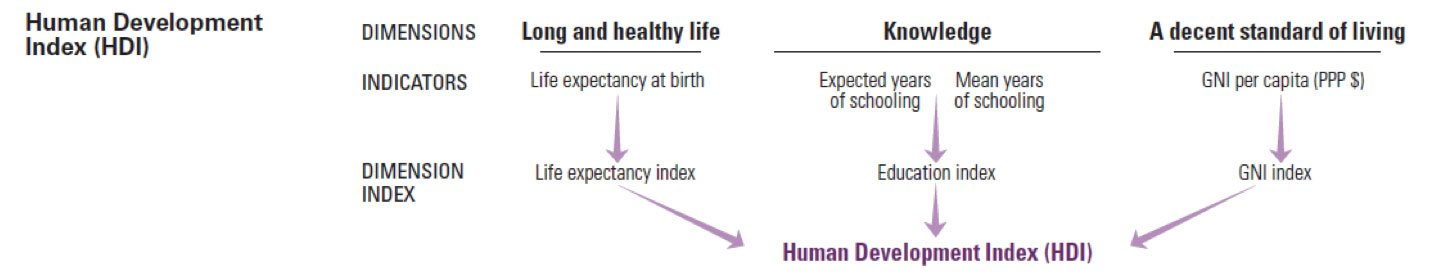

In [89]:
hdi = pd.read_csv('hdi tokyo.csv')
hdi.rename({'country':'Country Name','hdi':'HDI (2019)','pop2021':'Population 2021'},axis=1,inplace=True)
hdi.head()

,Country Name,HDI (2019),Population 2021
0,Norway,0.954,5465.630
1,Switzerland,0.946,8715.494
2,Ireland,0.942,4982.907
3,Hong Kong,0.939,7552.810
4,Germany,0.939,83900.473


In [90]:
test = test.merge(hdi,how='left',on='Country Name')

In [91]:
test[test['HDI (2019)'].isnull()==True]

,Country Name,Rio 2016 (G+S+B),London 2012 (G+B+S),Beijing 2008 (G+S+B),Athens 2004 (G+S+B),host_country,Total Medals (G+S+B),HDI (2019),Population 2021
33,North Korea,7.000,7.000,6.000,5.000,0,25.000,nan,nan
49,Taiwan,3.000,2.000,4.000,5.000,0,14.000,nan,nan
54,Kosovo,1.000,0.000,0.000,0.000,0,1.000,nan,nan
55,Puerto Rico,1.000,2.000,0.000,0.000,0,3.000,nan,nan
103,Samoa,0.000,0.000,1.000,0.000,0,1.000,nan,nan
108,Serbia and Montenegro,0.000,0.000,0.000,2.000,0,2.000,nan,nan


According to UNITED NATIONS DEVELOPMENT PROGRAMME - Human Development Reports, the countries mentioned does not have HDI recorded.

source: http://hdr.undp.org/en/countries

### GDP



source: http://data.uis.unesco.org/#

In [92]:
#Read csv downloaded from UNESCO.org
gdp = pd.read_csv('DEMO_DS_18072021055010403.csv')

#Data Cleaning
gdp.drop(['DEMO_IND','Indicator','LOCATION','Time','TIME','Flag Codes','Flags'],axis=1,inplace=True)
gdp.rename({'Value':'GDP per capita (US$)','Country':'Country Name'},inplace=True,axis=1)

gdp.set_index('Country Name',inplace=True)
gdp.rename({'United States of America':'United States',
 'United Kingdom of Great Britain and Northern Ireland':'United Kingdom','Russian Federation':'Russia',
 'China, Hong Kong Special Administrative Region':'Hong Kong'},axis=0,inplace=True)
gdp.reset_index(inplace=True)

gdp.head()

,Country Name,GDP per capita (US$)
0,Australia,54907
1,Austria,50277
2,Belgium,46117
3,Canada,46195
4,Czechia,23102


In [93]:
test = test.merge(gdp,how='left',on='Country Name')

In [94]:
test[test['GDP per capita (US$)'].isnull()==True]

,Country Name,Rio 2016 (G+S+B),London 2012 (G+B+S),Beijing 2008 (G+S+B),Athens 2004 (G+S+B),host_country,Total Medals (G+S+B),HDI (2019),Population 2021,GDP per capita (US$)
7,South Korea,21.000,30.000,32.000,30.000,0,113.000,0.906,51305.186,nan
17,Cuba,11.000,15.000,30.000,27.000,0,83.000,0.778,11317.505,nan
24,Iran,8.000,13.000,2.000,6.000,0,29.000,0.797,85028.759,nan
33,North Korea,7.000,7.000,6.000,5.000,0,25.000,nan,nan,nan
42,Czech Republic,10.000,11.000,7.000,9.000,0,37.000,0.891,10724.555,nan
48,Vietnam,2.000,1.000,1.000,0.000,0,4.000,0.693,98168.833,nan
49,Taiwan,3.000,2.000,4.000,5.000,0,14.000,nan,nan,nan
51,Ivory Coast,2.000,0.000,0.000,0.000,0,2.000,0.516,27053.629,nan
54,Kosovo,1.000,0.000,0.000,0.000,0,1.000,nan,nan,nan
60,Venezuela,3.000,1.000,1.000,2.000,0,7.000,0.726,28704.954,nan


### GDP dataset from The World Bank


source: https://data.worldbank.org/indicator/NY.GDP.PCAP.CD

In [95]:
gdp_unesco = pd.read_csv('API_NY.GDP.PCAP.CD_DS2_en_csv_v2_2627294.csv')
gdp_unesco.drop(['Country Code','Indicator Name','Indicator Code'],axis=1,inplace=True)


drop=[]
for i in gdp_unesco.iloc[:,1:-1].columns.astype(int):
    if i <= 2020:
        drop.append(str(i))
        
gdp_unesco.drop(drop,axis=1,inplace=True)
gdp_unesco.head()

,Country Name,Latest GDP
0,Aruba,30253.279
1,Africa Eastern and Southern,1326.664
2,Afghanistan,508.808
3,Africa Western and Central,1714.427
4,Angola,1895.771


In [96]:
gdp_unesco.set_index('Country Name',inplace=True)
gdp_unesco.rename({'Korea, Rep.':'South Korea','Iran, Islamic Rep.':'Iran',
                   'Venezuela, RB':'Venezuela','Syrian Arab Republic':'Syria'},axis=0,inplace=True)
gdp_unesco.reset_index(inplace=True)
gdp_unesco.head()

,Country Name,Latest GDP
0,Aruba,30253.279
1,Africa Eastern and Southern,1326.664
2,Afghanistan,508.808
3,Africa Western and Central,1714.427
4,Angola,1895.771


In [97]:
test = test.merge(gdp_unesco,how='left',on='Country Name')

In [98]:
test['GDP per capita (US$)'].fillna(test['Latest GDP'],inplace=True)

In [99]:
test.drop('Latest GDP',inplace=True,axis=1)
test[test['GDP per capita (US$)'].isnull()==True]

,Country Name,Rio 2016 (G+S+B),London 2012 (G+B+S),Beijing 2008 (G+S+B),Athens 2004 (G+S+B),host_country,Total Medals (G+S+B),HDI (2019),Population 2021,GDP per capita (US$)
33,North Korea,7.000,7.000,6.000,5.000,0,25.000,nan,nan,nan
49,Taiwan,3.000,2.000,4.000,5.000,0,14.000,nan,nan,nan
51,Ivory Coast,2.000,0.000,0.000,0.000,0,2.000,0.516,27053.629,nan
108,Serbia and Montenegro,0.000,0.000,0.000,2.000,0,2.000,nan,nan,nan


_Missing values in HDI (2019)_

In [100]:
test['HDI (2019)'].replace(np.NaN,0,inplace=True)

<IPython.core.display.Javascript object>

In [101]:
test[test['HDI (2019)'] == 0]

,Country Name,Rio 2016 (G+S+B),London 2012 (G+B+S),Beijing 2008 (G+S+B),Athens 2004 (G+S+B),host_country,Total Medals (G+S+B),HDI (2019),Population 2021,GDP per capita (US$)
33,North Korea,7.000,7.000,6.000,5.000,0,25.000,0.000,nan,nan
49,Taiwan,3.000,2.000,4.000,5.000,0,14.000,0.000,nan,nan
54,Kosovo,1.000,0.000,0.000,0.000,0,1.000,0.000,nan,4287.201
55,Puerto Rico,1.000,2.000,0.000,0.000,0,3.000,0.000,nan,32874.000
103,Samoa,0.000,0.000,1.000,0.000,0,1.000,0.000,nan,4316.000
108,Serbia and Montenegro,0.000,0.000,0.000,2.000,0,2.000,0.000,nan,nan


In [102]:
test['HDI (2019)'].describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count   112.000
mean      0.734
std       0.219
min       0.000
25%       0.704
50%       0.796
75%       0.872
90%       0.925
95%       0.938
99%       0.946
max       0.954
Name: HDI (2019), dtype: float64

In [103]:
test['HDI (2019)'].replace(0,test['HDI (2019)'].median(),inplace=True)

_Missing values in GDP per capita (current US$)_

In [104]:
test['GDP per capita (US$)'].replace(np.NaN,0,inplace=True)

<IPython.core.display.Javascript object>

In [105]:
test[test['GDP per capita (US$)']==0]

,Country Name,Rio 2016 (G+S+B),London 2012 (G+B+S),Beijing 2008 (G+S+B),Athens 2004 (G+S+B),host_country,Total Medals (G+S+B),HDI (2019),Population 2021,GDP per capita (US$)
33,North Korea,7.000,7.000,6.000,5.000,0,25.000,0.796,nan,0.000
49,Taiwan,3.000,2.000,4.000,5.000,0,14.000,0.796,nan,0.000
51,Ivory Coast,2.000,0.000,0.000,0.000,0,2.000,0.516,27053.629,0.000
108,Serbia and Montenegro,0.000,0.000,0.000,2.000,0,2.000,0.796,nan,0.000


In [106]:
test['GDP per capita (US$)'].describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count     112.000
mean    18922.414
std     20756.172
min         0.000
25%      3875.750
50%      9734.500
75%     30082.781
90%     50124.900
95%     64933.200
99%     78304.490
max     81994.000
Name: GDP per capita (US$), dtype: float64

In [107]:
test['GDP per capita (US$)'].replace(0,test['GDP per capita (US$)'].median(),inplace=True)

_Missing values in Population_

In [108]:
test[test['Population 2021'].isnull()==True]

,Country Name,Rio 2016 (G+S+B),London 2012 (G+B+S),Beijing 2008 (G+S+B),Athens 2004 (G+S+B),host_country,Total Medals (G+S+B),HDI (2019),Population 2021,GDP per capita (US$)
33,North Korea,7.000,7.000,6.000,5.000,0,25.000,0.796,nan,9734.500
49,Taiwan,3.000,2.000,4.000,5.000,0,14.000,0.796,nan,9734.500
54,Kosovo,1.000,0.000,0.000,0.000,0,1.000,0.796,nan,4287.201
55,Puerto Rico,1.000,2.000,0.000,0.000,0,3.000,0.796,nan,32874.000
103,Samoa,0.000,0.000,1.000,0.000,0,1.000,0.796,nan,4316.000
108,Serbia and Montenegro,0.000,0.000,0.000,2.000,0,2.000,0.796,nan,9734.500


In [109]:
test['Population 2021'].describe()

count       106.000
mean      62009.561
std      197116.470
min         113.021
25%        5102.361
50%       11474.915
75%       45431.708
max     1444216.107
Name: Population 2021, dtype: float64

In [110]:
test.fillna(test['Population 2021'].median(),inplace=True)

In [111]:
test.isnull().sum()

Country Name            0
Rio 2016 (G+S+B)        0
London 2012 (G+B+S)     0
Beijing 2008 (G+S+B)    0
Athens 2004 (G+S+B)     0
host_country            0
Total Medals (G+S+B)    0
HDI (2019)              0
Population 2021         0
GDP per capita (US$)    0
dtype: int64

In [112]:
initial_steps(df=test)

Structure of the dataset:
----------------------------------------------------------------------------------------------------

The dataset has 112 rows and 10 columns.

Total elements in this dataset are 1120

Missing Values Check
----------------------------------------------------------------------------------------------------
There are no missing values in the dataset

Info of the dataset
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 0 to 111
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Name          112 non-null    object 
 1   Rio 2016 (G+S+B)      112 non-null    float64
 2   London 2012 (G+B+S)   112 non-null    float64
 3   Beijing 2008 (G+S+B)  112 non-null    float64
 4   Athens 2004 (G+S+B)   112 non-null    float64
 5   host_country          112 non-null 

,Country Name,Rio 2016 (G+S+B),London 2012 (G+B+S),Beijing 2008 (G+S+B),Athens 2004 (G+S+B),host_country,Total Medals (G+S+B),HDI (2019),Population 2021,GDP per capita (US$)


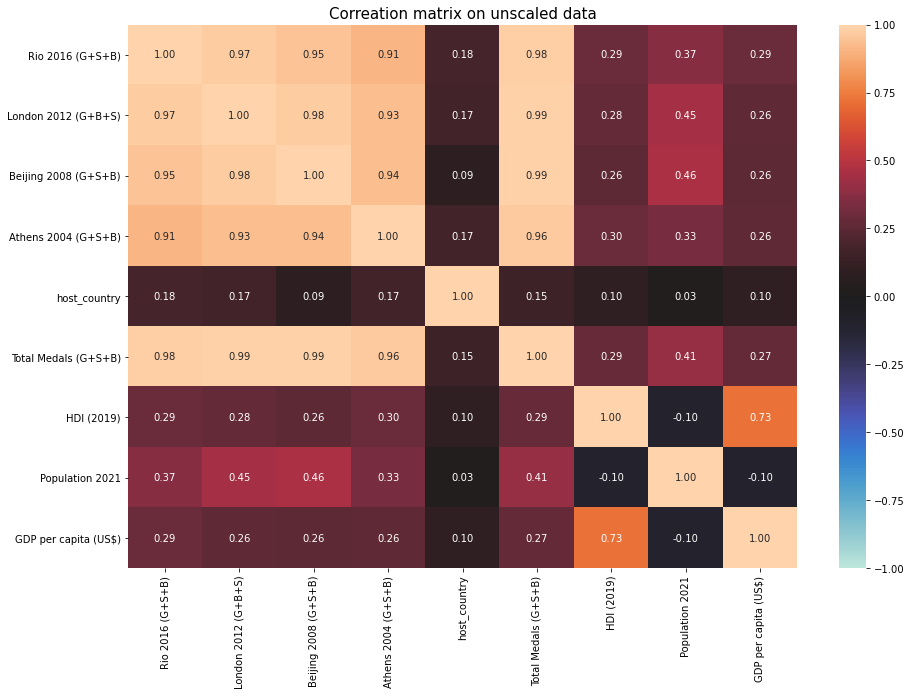

In [113]:
plt.figure(figsize=[15,10])
sns.heatmap(test.corr(),annot=True,fmt='.2f',vmin=-1,vmax=1,center=0)
plt.title('Correation matrix on unscaled data',fontsize=15);

### Outliers in Train

In [114]:
sorted(train)

Q1=test.quantile(0.25)
Q3=test.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Rio 2016 (G+S+B)           9.000
London 2012 (G+B+S)        7.250
Beijing 2008 (G+S+B)       6.000
Athens 2004 (G+S+B)        7.000
host_country               0.000
Total Medals (G+S+B)      28.250
HDI (2019)                 0.149
Population 2021        39225.404
GDP per capita (US$)   25772.031
dtype: float64


In [115]:
iqr = ((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any()
iqr = iqr.to_frame().reset_index().rename(columns={'index':'Columns',0:'Outliers in Training data'})
outliers = iqr[iqr['Outliers in Training data']==True]
outliers

,Columns,Outliers in Training data
0,Athens 2004 (G+S+B),True
1,Beijing 2008 (G+S+B),True
13,London 2012 (G+B+S),True
19,Rio 2016 (G+S+B),True
20,Total Medals (G+S+B),True


### Outliers in test

In [116]:
sorted(test)

Q1=test.quantile(0.25)
Q3=test.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Rio 2016 (G+S+B)           9.000
London 2012 (G+B+S)        7.250
Beijing 2008 (G+S+B)       6.000
Athens 2004 (G+S+B)        7.000
host_country               0.000
Total Medals (G+S+B)      28.250
HDI (2019)                 0.149
Population 2021        39225.404
GDP per capita (US$)   25772.031
dtype: float64


In [117]:
iqr = ((test < (Q1 - 1.5 * IQR)) |(test > (Q3 + 1.5 * IQR))).any()
iqr = iqr.to_frame().reset_index().rename(columns={'index':'Columns',0:'Outliers in testing data'})
outliers = iqr[iqr['Outliers in testing data']==True]
outliers

,Columns,Outliers in testing data
0,Athens 2004 (G+S+B),True
1,Beijing 2008 (G+S+B),True
3,GDP per capita (US$),True
4,HDI (2019),True
5,London 2012 (G+B+S),True
6,Population 2021,True
7,Rio 2016 (G+S+B),True
8,Total Medals (G+S+B),True
9,host_country,True


In [118]:
# Outlier Treatment - Winsorization

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [119]:
nums=train.describe().columns.tolist()
for column in nums:
    lr,ur=remove_outlier(train[column])
    train[column]=np.where(train[column]>ur,train[column].quantile(0.95),train[column])
    train[column]=np.where(train[column]<lr,train[column].quantile(0.05),train[column])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [120]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Rio 2016 (G+S+B),112.000,7.572,11.457,0.000,1.000,2.500,10.000,41.450
host_country_rio,112.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
London 2012 (G+B+S),112.000,7.159,10.748,0.000,1.000,2.500,8.250,36.350
host_country_London,112.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Beijing 2008 (G+S+B),112.000,8.406,13.651,0.000,1.000,3.000,7.000,41.900
host_country_beijing,112.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Athens 2004 (G+S+B),112.000,7.357,11.422,0.000,0.000,3.000,7.000,34.800
host_country_Athens,112.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Population 2004,112.000,27542146.839,41521754.582,104346.000,4083190.500,7653434.250,27644774.000,131162739.000
Population 2008,112.000,28324114.203,42559312.059,105457.000,4444584.250,8006496.750,30708002.250,138055979.900


In [121]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Rio 2016 (G+S+B),112.000,8.670,16.741,0.000,1.000,2.500,10.000,121.000
London 2012 (G+B+S),112.000,8.571,16.888,0.000,1.000,2.500,8.250,104.000
Beijing 2008 (G+S+B),112.000,8.554,17.314,0.000,1.000,3.000,7.000,112.000
Athens 2004 (G+S+B),112.000,8.277,16.334,0.000,0.000,3.000,7.000,101.000
host_country,112.000,0.009,0.094,0.000,0.000,0.000,0.000,1.000
Total Medals (G+S+B),112.000,34.071,65.898,1.000,2.000,11.000,30.250,438.000
HDI (2019),112.000,0.777,0.131,0.377,0.724,0.796,0.872,0.954
Population 2021,112.000,59302.348,192055.417,113.021,5464.403,11474.915,44689.806,1444216.107
GDP per capita (US$),112.000,19270.075,20514.283,261.000,4310.750,9736.250,30082.781,81994.000


In [122]:
# train.to_csv('train.csv',index=False)
# test.to_csv('test.csv',index=False)

In [123]:
X = train.drop(['Country Name','Rio 2016 (G+S+B)'],axis=1)
y = train['Rio 2016 (G+S+B)']

In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [125]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [126]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('mean_absolute_error:', mae)
    print('mean_squared_error:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('=============')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [127]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [128]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [129]:
# print the intercept
print(lin_reg.intercept_)

7.226923076923077


In [130]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df


,Coefficient
host_country_rio,0.000
London 2012 (G+B+S),9.633
host_country_London,0.000
Beijing 2008 (G+S+B),-1.764
host_country_beijing,-0.000
Athens 2004 (G+S+B),-1.266
host_country_Athens,-0.000
Population 2004,0.174
Population 2008,-10.933
Population 2012,45.689


In [131]:
pred = lin_reg.predict(X_test)

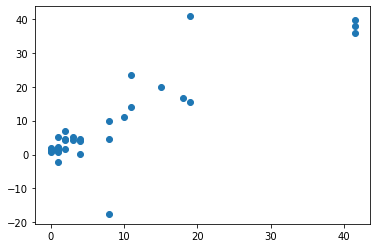

In [132]:
plt.scatter(y_test, pred)

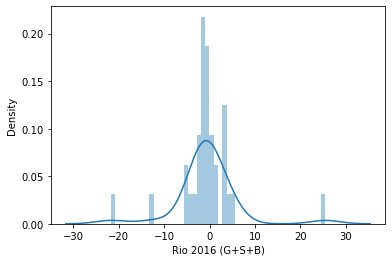

In [133]:
sns.distplot((y_test - pred), bins=50);

In [134]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n-----------------------------')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n-----------------------------')
print_evaluate(y_train, train_pred)

Test set evaluation:
-----------------------------


<IPython.core.display.Javascript object>

mean_absolute_error: 3.6515170521048295
mean_squared_error: 43.633001238516655
RMSE: 6.6055280817294735
R2 Square 0.6823443967068052
Train set evaluation:
-----------------------------


<IPython.core.display.Javascript object>

mean_absolute_error: 1.930838033879719
mean_squared_error: 8.372136838821191
RMSE: 2.893464504503415
R2 Square 0.9338358654462067


In [135]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

<IPython.core.display.Javascript object>

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,3.652,43.633,6.606,0.682,-6.319


In [136]:
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model_ridge.fit(X_train, y_train)
pred = model_ridge.predict(X_test)

test_pred = model_ridge.predict(X_test)
train_pred = model_ridge.predict(X_train)

print('Test set evaluation:\n-----------------------------')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n-----------------------------')
print_evaluate(y_train, train_pred)

Test set evaluation:
-----------------------------


<IPython.core.display.Javascript object>

mean_absolute_error: 3.546614168918754
mean_squared_error: 23.437506093113342
RMSE: 4.84122981205327
R2 Square 0.8293710052857013
Train set evaluation:
-----------------------------


<IPython.core.display.Javascript object>

mean_absolute_error: 3.427612597392621
mean_squared_error: 23.445540110556795
RMSE: 4.84205949060488
R2 Square 0.8147123129464213


In [137]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

<IPython.core.display.Javascript object>

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,3.652,43.633,6.606,0.682,-6.319
1,Ridge Regression,3.547,23.438,4.841,0.829,-7.673


In [138]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n-----------------------------')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n-----------------------------')
print_evaluate(y_train, train_pred)

Test set evaluation:
-----------------------------


<IPython.core.display.Javascript object>

mean_absolute_error: 2.4791792993195862
mean_squared_error: 18.16683683754027
RMSE: 4.262257246757904
R2 Square 0.8677423658296564
Train set evaluation:
-----------------------------


<IPython.core.display.Javascript object>

mean_absolute_error: 2.026460622846804
mean_squared_error: 9.925573667268136
RMSE: 3.150487845916587
R2 Square 0.9215592142976508


In [139]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

<IPython.core.display.Javascript object>

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,3.652,43.633,6.606,0.682,-6.319
1,Ridge Regression,3.547,23.438,4.841,0.829,-7.673
2,Lasso Regression,2.479,18.167,4.262,0.868,-2.347


In [140]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n-----------------------------')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n-----------------------------')
print_evaluate(y_train, train_pred)

Test set evaluation:
-----------------------------


<IPython.core.display.Javascript object>

mean_absolute_error: 4.202688815066617
mean_squared_error: 102.19249698058675
RMSE: 10.109030466893785
R2 Square 0.256021397589522
Train set evaluation:
-----------------------------


<IPython.core.display.Javascript object>

mean_absolute_error: 2.4629870792453472e-14
mean_squared_error: 1.2211667948834753e-27
RMSE: 3.494519702167202e-14
R2 Square 1.0


In [141]:
results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

<IPython.core.display.Javascript object>

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,3.652,43.633,6.606,0.682,-6.319
1,Ridge Regression,3.547,23.438,4.841,0.829,-7.673
2,Lasso Regression,2.479,18.167,4.262,0.868,-2.347
3,Polynomail Regression,4.203,102.192,10.109,0.256,0.000


In [142]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=300, penalty=None, eta0=0.00001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n-----------------------------')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n-----------------------------')
print_evaluate(y_train, train_pred)

Test set evaluation:
-----------------------------


<IPython.core.display.Javascript object>

mean_absolute_error: 5.384370579103877
mean_squared_error: 41.530270972964736
RMSE: 6.444398418236161
R2 Square 0.6976526274520498
Train set evaluation:
-----------------------------


<IPython.core.display.Javascript object>

mean_absolute_error: 5.428483827989634
mean_squared_error: 47.29102013924703
RMSE: 6.876846671203818
R2 Square 0.6262639419400777


In [143]:
results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

<IPython.core.display.Javascript object>

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,3.652,43.633,6.606,0.682,-6.319
1,Ridge Regression,3.547,23.438,4.841,0.829,-7.673
2,Lasso Regression,2.479,18.167,4.262,0.868,-2.347
3,Polynomail Regression,4.203,102.192,10.109,0.256,0.000
4,Stochastic Gradient Descent,5.384,41.530,6.444,0.698,0.000


<AxesSubplot:ylabel='Model'>

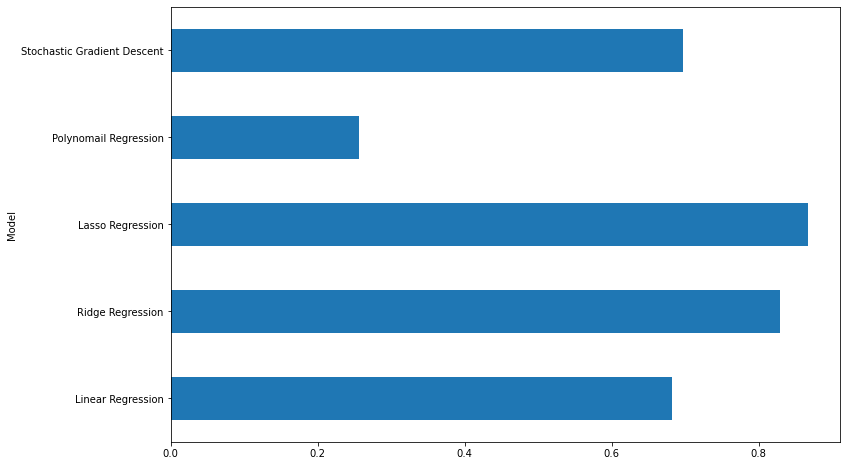

In [144]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

### Train

In [145]:
model

Lasso(alpha=0.1, positive=True, precompute=True, random_state=42,
      selection='random')

In [146]:
X_scaled = StandardScaler().fit_transform(olympics.iloc[:,1:])
# y_scaled = StandardScaler().fit(y)
# y_scaled = np.array(y_scaled).reshape(1, -1)
model.fit(X_scaled, olympics['Rio 2016 (G+S+B)'])
predictions = model.predict(X_scaled)
predictions = predictions.astype(int)
output_train = pd.DataFrame({'Country Name': olympics['Country Name'], 'Predicted Medals Rio 2016 (G+S+B)': predictions, 
                           'Actual Medals Rio 2016 (G+S+B)':olympics['Rio 2016 (G+S+B)']})
# output.to_csv('VaishnaviKarelia_submission.csv', index=False)
output_train.head()

,Country Name,Predicted Medals Rio 2016 (G+S+B),Actual Medals Rio 2016 (G+S+B)
0,United States,119,121.000
1,United Kingdom,65,67.000
2,China,70,70.000
3,Russia,56,56.000
4,Germany,41,42.000


In [147]:
np.sqrt(((output_train['Predicted Medals Rio 2016 (G+S+B)'].sum() - output_train['Actual Medals Rio 2016 (G+S+B)'].sum())**2)/olympics.shape[0])

<IPython.core.display.Javascript object>

3.6851536118399655

### Test

In [148]:
test.head()

,Country Name,Rio 2016 (G+S+B),London 2012 (G+B+S),Beijing 2008 (G+S+B),Athens 2004 (G+S+B),host_country,Total Medals (G+S+B),HDI (2019),Population 2021,GDP per capita (US$)
0,United States,121.000,104.000,112.000,101.000,0,438.000,0.920,332915.073,65118.000
1,United Kingdom,67.000,65.000,51.000,30.000,0,213.000,0.920,68207.116,42300.000
2,China,70.000,91.000,100.000,63.000,0,324.000,0.758,1444216.107,10262.000
3,Russia,56.000,68.000,60.000,90.000,0,274.000,0.824,145912.025,11585.000
4,Germany,42.000,44.000,41.000,49.000,0,176.000,0.939,83900.473,46259.000


In [149]:
# from sklearn.preprocessing import PowerTransformer
# X_scaled = PowerTransformer().fit_transform(X=test.iloc[:,1:])
# y = PowerTransformer().fit_transform(X=test.iloc[79:,1:])

In [150]:
X_scaled = StandardScaler().fit_transform(test.iloc[:,1:])
# y_scaled = StandardScaler().fit(y)
# np.array(y_scaled).reshape(-1, 1)
model.fit(X_scaled,test['Rio 2016 (G+S+B)'])
predictions = model.predict(X_scaled)
predictions = predictions.astype(int)
output = pd.DataFrame({'Country Name': train['Country Name'], 'Tokyo 2020 (G+S+B)': predictions})
# print(output.shape)
# output.head(10)

In [151]:
medals = []
for i in output['Tokyo 2020 (G+S+B)']:
    if i < 0:
        medals.append(0)
    else:
        medals.append(i)
output['Tokyo 2020 (G+S+B)'] = medals        

In [152]:
output[output['Tokyo 2020 (G+S+B)']<0].shape

(0, 2)

In [153]:
output.head(10)

,Country Name,Tokyo 2020 (G+S+B)
0,United States,120
1,United Kingdom,66
2,China,69
3,Russia,55
4,Germany,41
5,Japan,40
6,France,41
7,South Korea,21
8,Italy,27
9,Australia,29


In [154]:
output.to_csv('VaishnaviKarelia_submission.csv', index=False)

In [155]:
output.sort_values(by='Tokyo 2020 (G+S+B)',ascending=False).iloc[:10,:]

,Country Name,Tokyo 2020 (G+S+B)
0,United States,120
2,China,69
1,United Kingdom,66
3,Russia,55
4,Germany,41
6,France,41
5,Japan,40
9,Australia,29
8,Italy,27
19,Canada,21


In [156]:
top_10 = output.sort_values(by='Tokyo 2020 (G+S+B)',ascending=False).iloc[:10,:]

<AxesSubplot:xlabel='Tokyo 2020 (G+S+B)', ylabel='Country Name'>

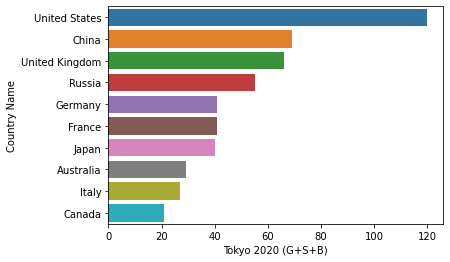

In [157]:
sns.barplot(data=top_10,x='Tokyo 2020 (G+S+B)',y='Country Name')